<center>
  <h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">
    Diabetes Disease Prediction - Random Forest Classifier
  </h1>
</center>
<center>
  <img src="https://raw.githubusercontent.com/611noorsaeed/Diabetes-Disease-Prediction-Model/main/img.jpeg" 
       alt="Diabetes Prediction" 
       style="width:58%; border-radius:15px; box-shadow: 0 0 10px #333;">
</center>


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">About the Dataset</h2>

- **Pregnancies**  – Number of times the patient has been pregnant.
- **Glucose**     – Plasma glucose concentration (mg/dL).
- **BloodPressure**        – Particulate matter smaller than 2.5 micrometers (µg/m³).
- **SkinThickness**         – Triceps skinfold thickness (mm).
- **Insulin**          – 2-Hour serum insulin (mu U/ml).
- **BMI**          – Body Mass Index (weight in kg / (height in m)^2).
- **DiabetesPedigreeFunction**           – A function that scores the likelihood of diabetes based on family history.
- **Age**  – Distance to industrial areas (possibly km).
- **Outcome**  – Class variable (0 = Non-diabetic, 1 = Diabetic)




<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries</h1>

In [125]:
import pandas as pd
import numpy as np
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier



<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Load the Data</h1>

In [126]:

data=pd.read_csv(r"F:\Ahmed Dahy\Projects\diabetes.csv")

In [127]:
print(data.columns.tolist())


['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Cleaning</h1>

In [128]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
existing_cols = [col for col in cols_with_invalid_zeros if col in data.columns]

data[existing_cols] = data[existing_cols].replace(0, np.nan)

print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Unnamed: 0.4                0
Unnamed: 0.3                0
Unnamed: 0.2                0
Unnamed: 0.1                0
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [129]:
data.fillna(data.mean(), inplace=True)


In [130]:
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Unnamed: 0.4                0
Unnamed: 0.3                0
Unnamed: 0.2                0
Unnamed: 0.1                0
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [131]:
data.to_csv("cleaned_diabetes_data.csv", index=False)


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Preprocessing</h1>

In [132]:
data

Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0               0             0             0             0           0   
1               1             1             1             1           1   
2               2             2             2             2           2   
3               3             3             3             3           3   
4               4             4             4             4           4   
..            ...           ...           ...           ...         ...   
732           732           732           733           742         763   
733           733           733           734           743         764   
734           734           734           735           744         765   
735           735           735           736           745         766   
736           736           736           737           746         767   

     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6    148.0           72.0       35.00000  33.6   
1              1     85.0           66.0       29.00000  26.6   
2              8    183.0           64.0       29.15342  23.3   
3              1     89.0           66.0       23.00000  28.1   
4              0    137.0           40.0       35.00000  43.1   
..           ...      ...            ...            ...   ...   
732           10    101.0           76.0       48.00000  32.9   
733            2    122.0           70.0       27.00000  36.8   
734            5    121.0           72.0       23.00000  26.2   
735            1    126.0           60.0       29.15342  30.1   
736            1     93.0           70.0       31.00000  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
732                     0.171   63        0  
733                     0.340   27        0  
734                     0.245   30        0  
735                     0.349   47        1  
736                     0.315   23        0  

[737 rows x 13 columns]

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.4              737 non-null    int64  
 1   Unnamed: 0.3              737 non-null    int64  
 2   Unnamed: 0.2              737 non-null    int64  
 3   Unnamed: 0.1              737 non-null    int64  
 4   Unnamed: 0                737 non-null    int64  
 5   Pregnancies               737 non-null    int64  
 6   Glucose                   737 non-null    float64
 7   BloodPressure             737 non-null    float64
 8   SkinThickness             737 non-null    float64
 9   BMI                       737 non-null    float64
 10  DiabetesPedigreeFunction  737 non-null    float64
 11  Age                       737 non-null    int64  
 12  Outcome                   737 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 75.0 KB


In [134]:
data.describe()

Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
count    737.000000    737.000000    737.000000    737.000000  737.000000   
mean     368.000000    368.000000    368.113976    373.097693  384.031208   
std      212.897863    212.897863    213.073059    215.788811  222.414512   
min        0.000000      0.000000      0.000000      0.000000    0.000000   
25%      184.000000    184.000000    184.000000    187.000000  194.000000   
50%      368.000000    368.000000    368.000000    374.000000  385.000000   
75%      552.000000    552.000000    552.000000    560.000000  577.000000   
max      736.000000    736.000000    737.000000    746.000000  767.000000   

       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   737.000000  737.000000     737.000000     737.000000  737.000000   
mean      3.785617  120.970738      72.111765      28.942368   32.164009   
std       3.282887   30.206372      11.838658       8.704505    6.365927   
min       0.000000   44.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.000000      64.000000      25.000000   27.500000   
50%       3.000000  117.000000      72.000000      29.153420   32.300000   
75%       6.000000  139.000000      80.000000      32.000000   36.300000   
max      13.000000  199.000000     122.000000      99.000000   49.300000   

       DiabetesPedigreeFunction         Age     Outcome  
count                737.000000  737.000000  737.000000  
mean                   0.470198   32.507463    0.340570  
std                    0.327520   10.744324    0.474223  
min                    0.078000   21.000000    0.000000  
25%                    0.241000   24.000000    0.000000  
50%                    0.371000   29.000000    0.000000  
75%                    0.626000   40.000000    1.000000  
max                    2.329000   64.000000    1.000000

In [135]:
data.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [136]:
# Outliers handling

cd = data.copy()
columns = ['Pregnancies', 'Glucose', 'BMI', 'Age']

for column in columns :
    Q1 = cd[column].quantile(0.25)
    Q3 = cd[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    cd = cd[(cd[column] >= lower) & (cd[column] <= upper)]


In [137]:
clean_data = cd.drop(columns=["Insulin"], errors='ignore')

columns_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
clean_data[columns_with_zero] = clean_data[columns_with_zero].replace(0,np.nan)
clean_data[columns_with_zero] = clean_data[columns_with_zero].fillna(clean_data[columns_with_zero].median())
clean_data.to_csv("diabetes.csv")


In [138]:
# split X and Y

X = clean_data.drop(columns = ["Outcome"])
Y = clean_data["Outcome"]

In [139]:
scaler = StandardScaler()
scaler.fit(X)
Standard_data = scaler.fit_transform(X)
X = Standard_data


In [140]:
X

array([[-1.72970226, -1.72970226, -1.72881532, ...,  0.22572773,
         0.47908038,  1.62917803],
       [-1.72500199, -1.72500199, -1.72411891, ..., -0.87462325,
        -0.36418864, -0.14039845],
       [-1.72030171, -1.72030171, -1.71942249, ..., -1.39336014,
         0.61656989, -0.04726284],
       ...,
       [ 1.72030171,  1.72030171,  1.72304835, ..., -0.93750045,
        -0.68805283, -0.23353405],
       [ 1.72500199,  1.72500199,  1.72774477, ..., -0.32444776,
        -0.37029929,  1.34977121],
       [ 1.72970226,  1.72970226,  1.73244118, ..., -0.27728986,
        -0.47418025, -0.88548328]])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Spliting Data</h1>

In [141]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size = 0.2, random_state = 42)


X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (589, 12)
Shape of X_test: (148, 12)
Shape of y_train: (589,)
Shape of y_test: (148,)


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualization</h1>

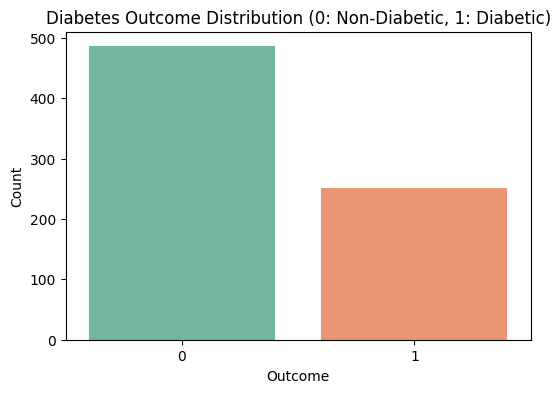

In [142]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=data, hue="Outcome", palette='Set2', legend=False)
plt.title("Diabetes Outcome Distribution (0: Non-Diabetic, 1: Diabetic)")
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

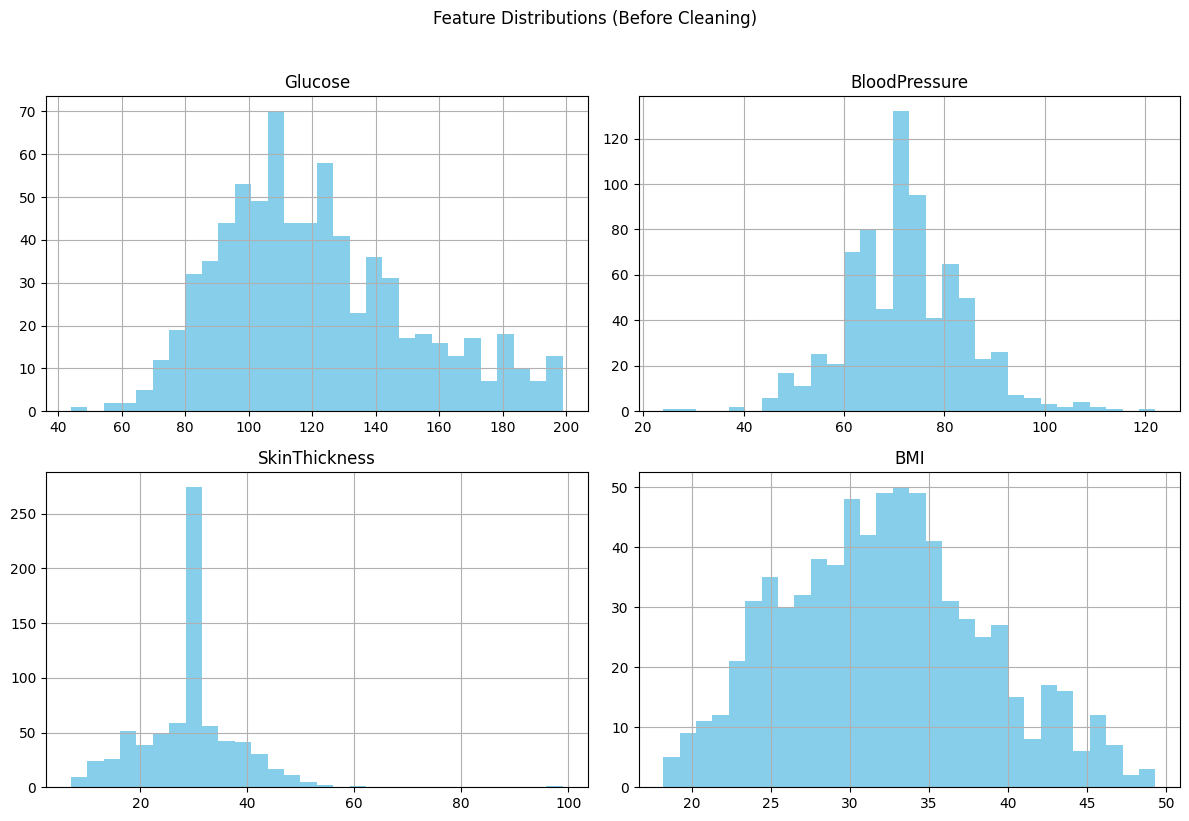

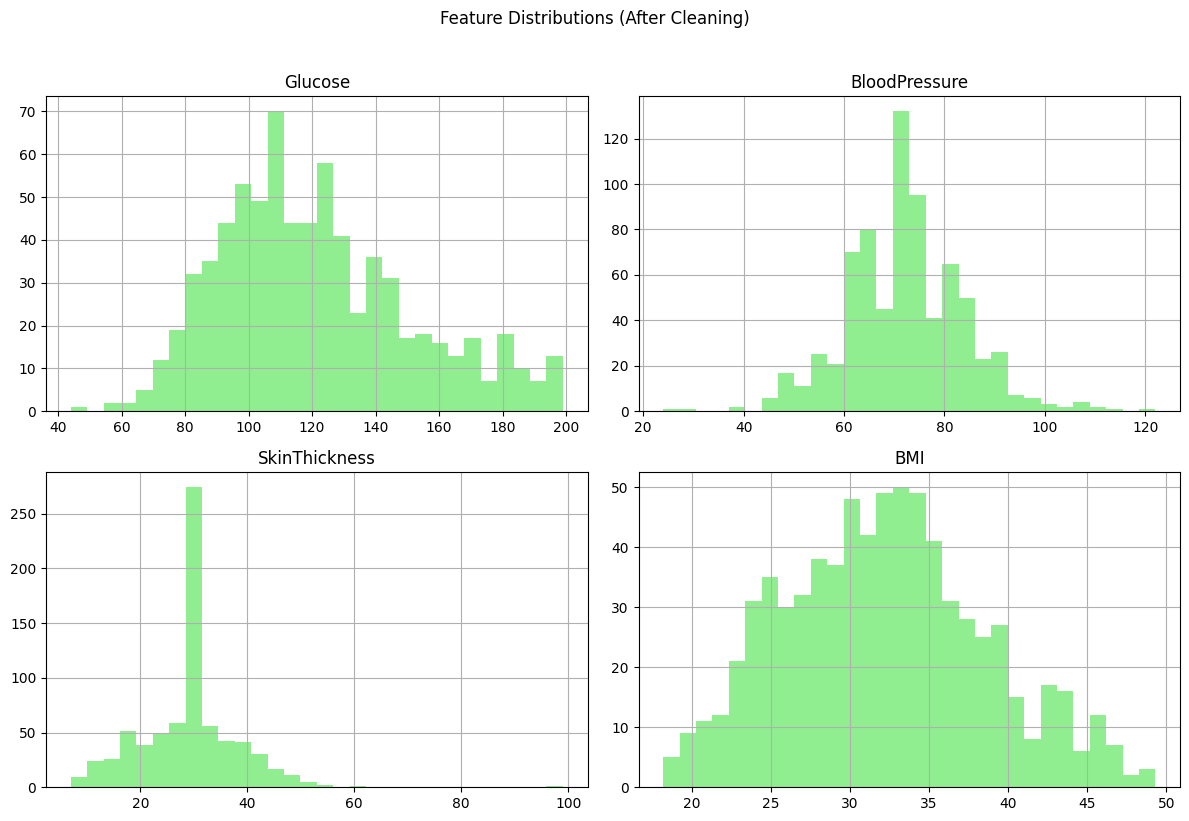

In [143]:
# Before cleaning (with zeros)
plt.figure(figsize=(12, 8))
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# استخدم فقط الأعمدة الموجودة فعلاً في data
existing_before = [col for col in cols_with_zeros if col in data.columns]
data[existing_before].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle('Feature Distributions (Before Cleaning)', y=1.02)
plt.tight_layout()
plt.show()

# After cleaning (zeros replaced with median)
clean_data = pd.read_csv("cleaned_diabetes_data.csv")

# استخدم فقط الأعمدة الموجودة في clean_data
existing_after = [col for col in cols_with_zeros if col in clean_data.columns]
clean_data[existing_after].hist(bins=30, figsize=(12, 8), color='lightgreen')
plt.suptitle('Feature Distributions (After Cleaning)', y=1.02)
plt.tight_layout()
plt.show()


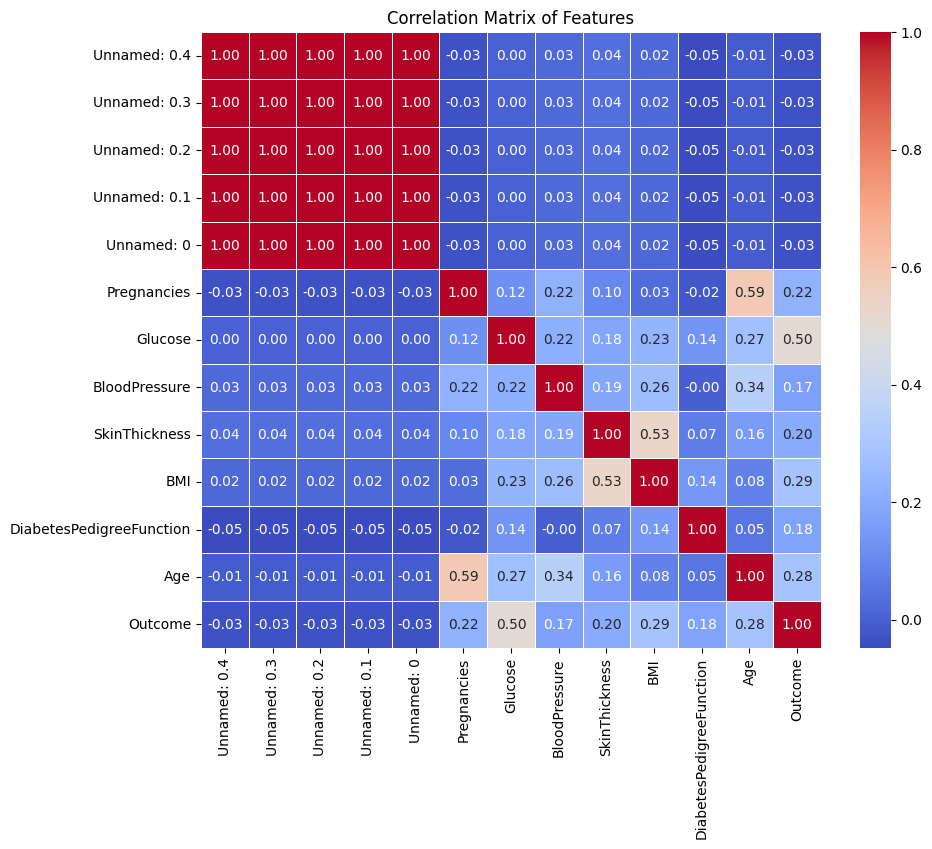

In [144]:
plt.figure(figsize=(10, 8))
corr = clean_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

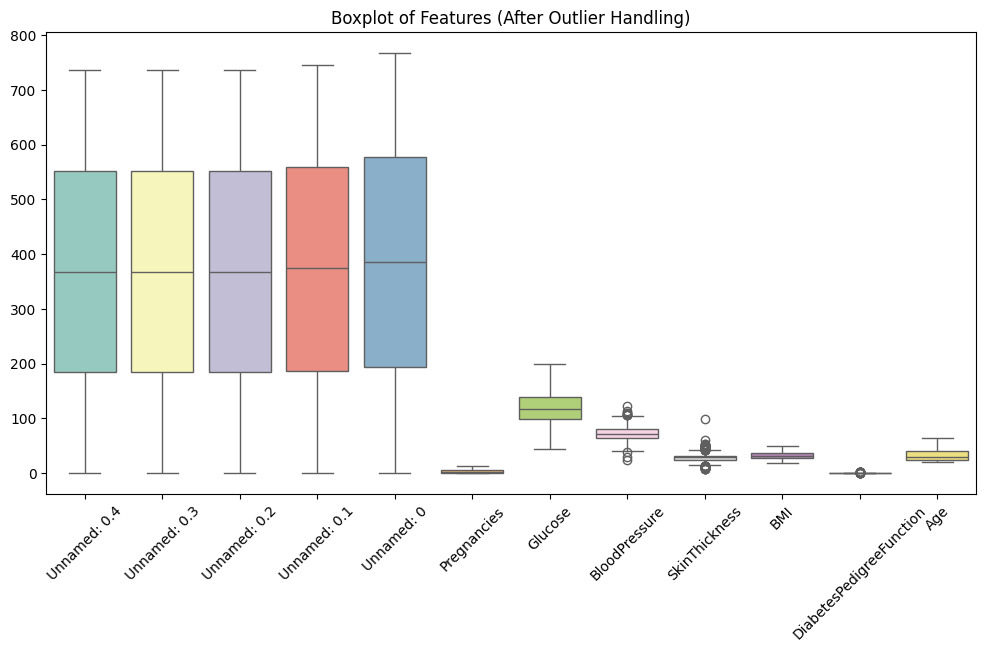

In [145]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data.drop(columns=['Outcome']), palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot of Features (After Outlier Handling)')
plt.show()

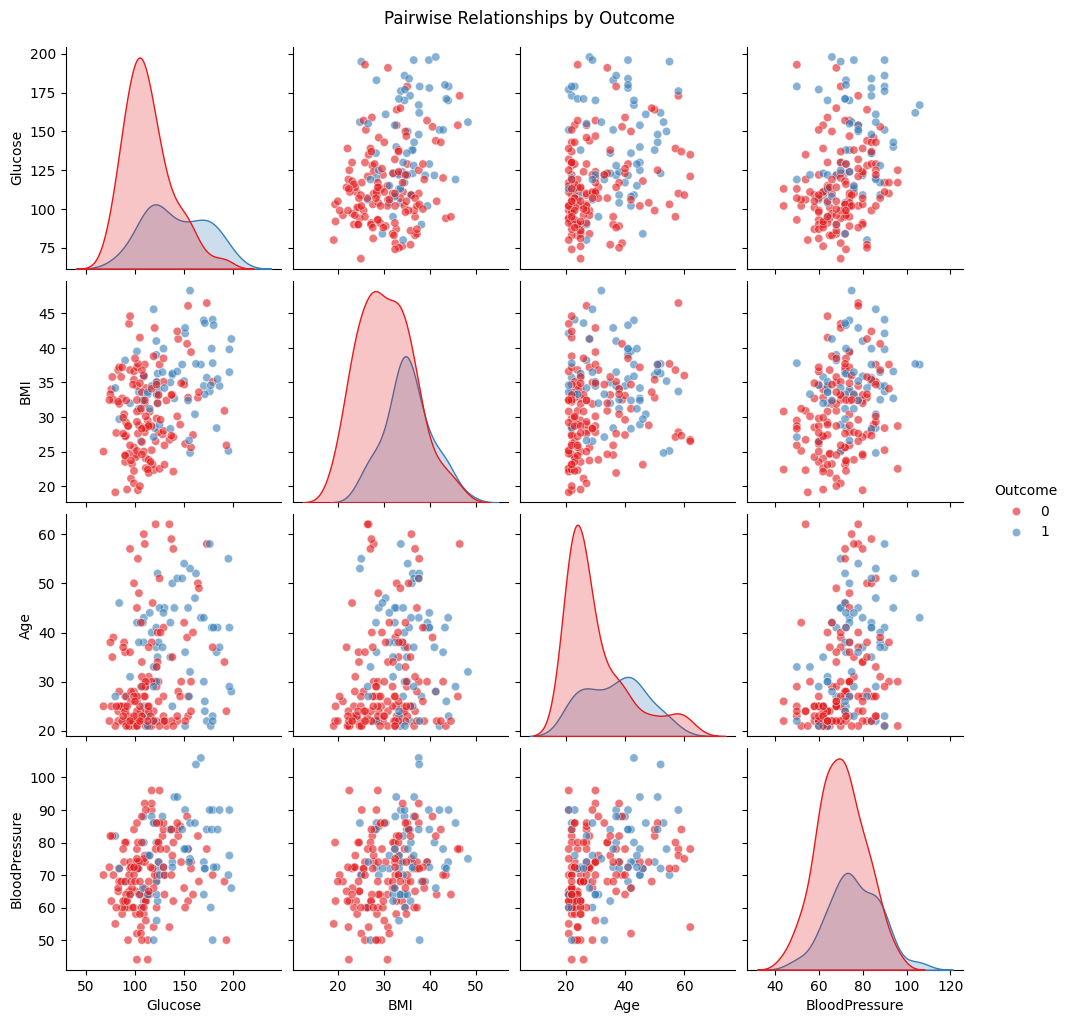

In [146]:
sns.pairplot(clean_data.sample(200), hue='Outcome', 
             vars=['Glucose', 'BMI', 'Age', 'BloodPressure'], 
             palette='Set1', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships by Outcome', y=1.02)
plt.show()

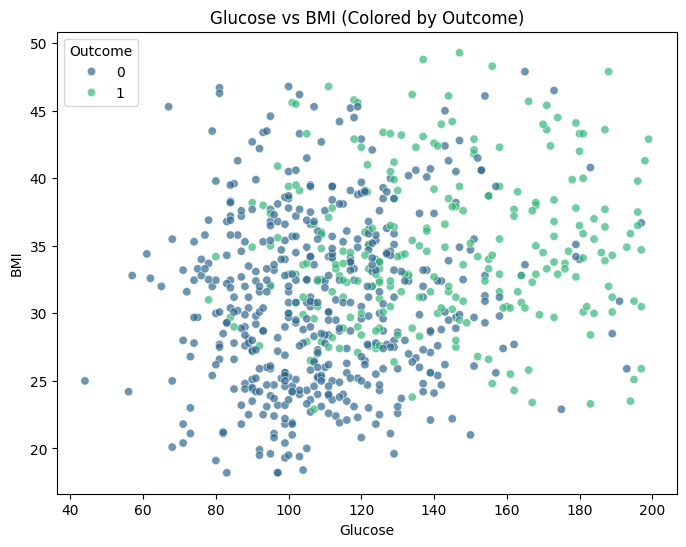

In [147]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=clean_data, 
                palette='viridis', alpha=0.7)
plt.title('Glucose vs BMI (Colored by Outcome)')
plt.show()

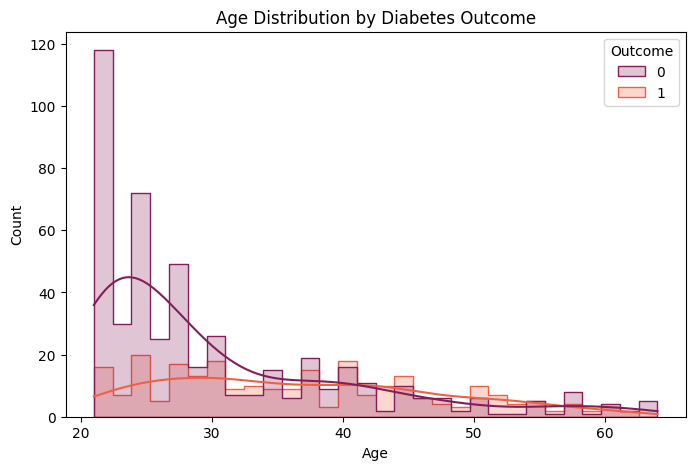

In [148]:
plt.figure(figsize=(8, 5))
sns.histplot(data=clean_data, x='Age', hue='Outcome', kde=True, 
             palette='rocket', bins=30, element='step')
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

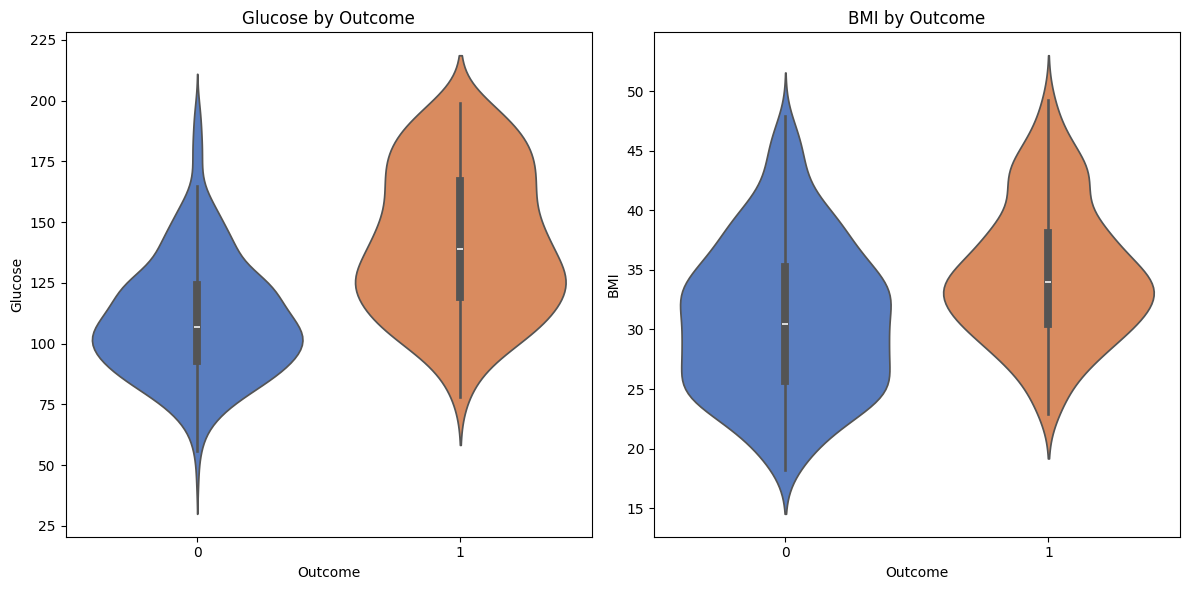

In [149]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Glucose', 'BMI']):  # شيل Insulin مؤقتًا
    plt.subplot(1, 2, i + 1)
    sns.violinplot(x='Outcome', y=col, data=clean_data, palette='muted', hue='Outcome', legend=False)
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()


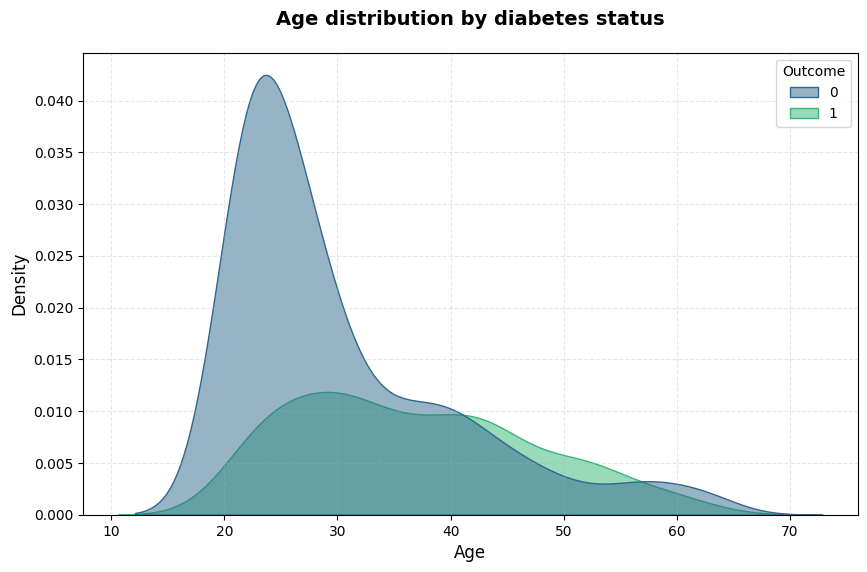

In [150]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', palette='viridis', fill=True, alpha=0.5)
plt.title('Age distribution by diabetes status', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

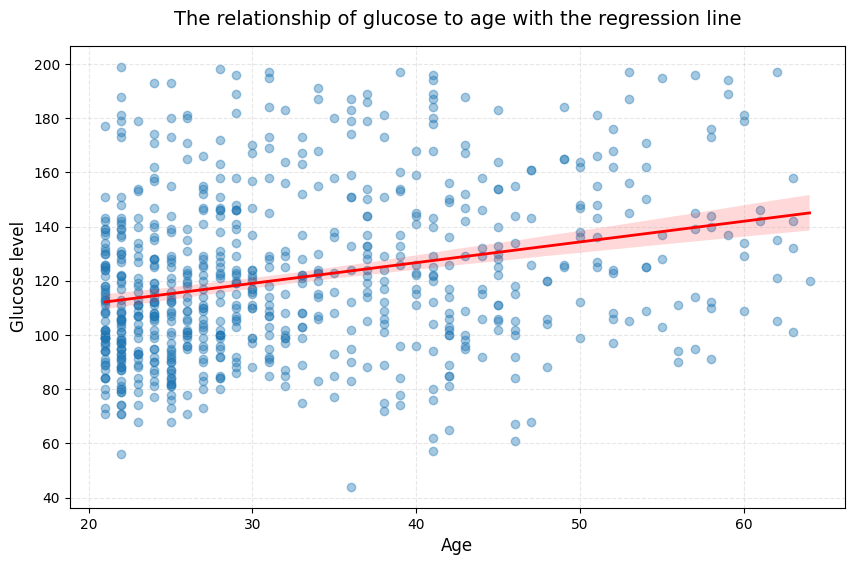

In [151]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Glucose', data=data, scatter_kws={'alpha':0.4}, 
           line_kws={'color':'red', 'linewidth':2})
plt.title('The relationship of glucose to age with the regression line', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Glucose level', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

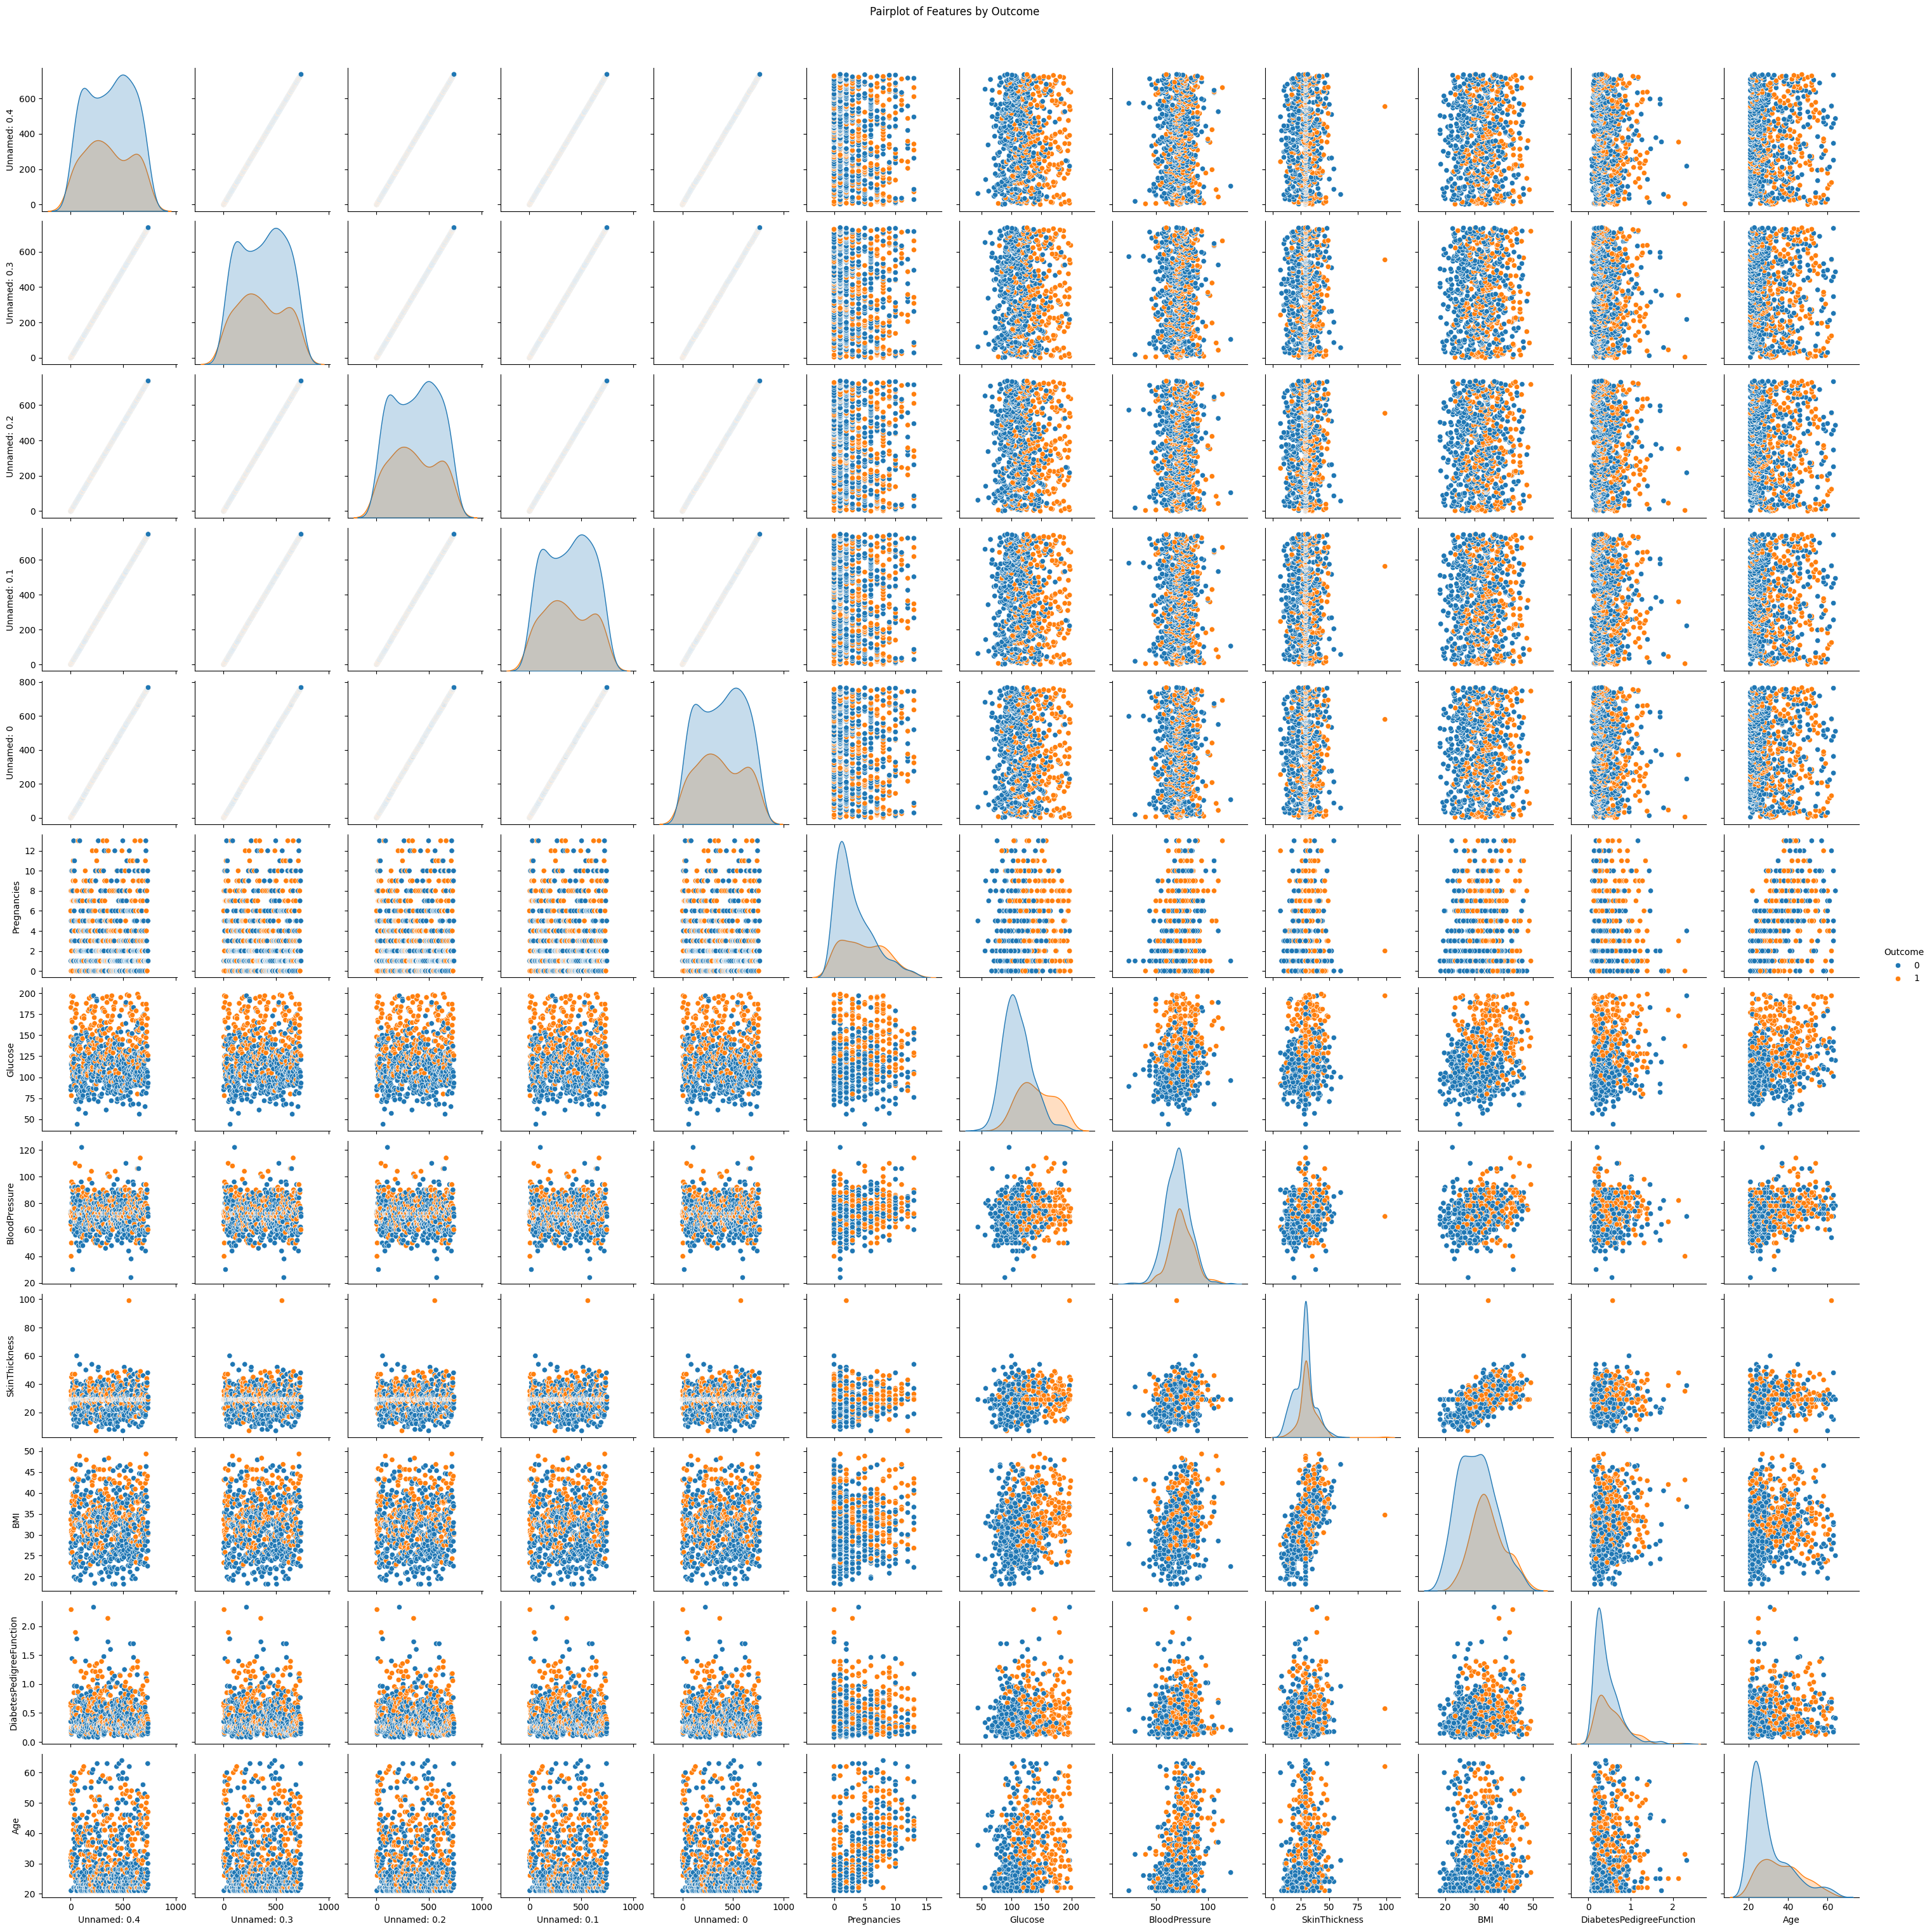

In [152]:
sns.pairplot(data, hue='Outcome')
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()




C:\Users\ahmed\AppData\Local\Temp\ipykernel_15740\2129809973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=data, palette='rocket',


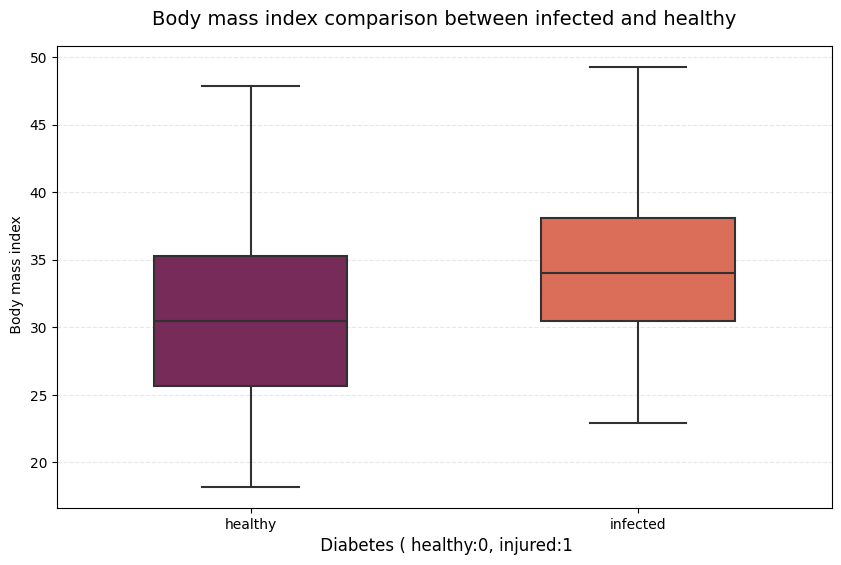

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data, palette='rocket', 
           width=0.5, fliersize=3, linewidth=1.5)
plt.title('Body mass index comparison between infected and healthy', fontsize=14, pad=15)
plt.xlabel((' Diabetes ( healthy:0, injured:1'),fontsize=12)
plt.ylabel(' Body mass index')
plt.xticks([0,1], ['healthy', 'infected'])
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

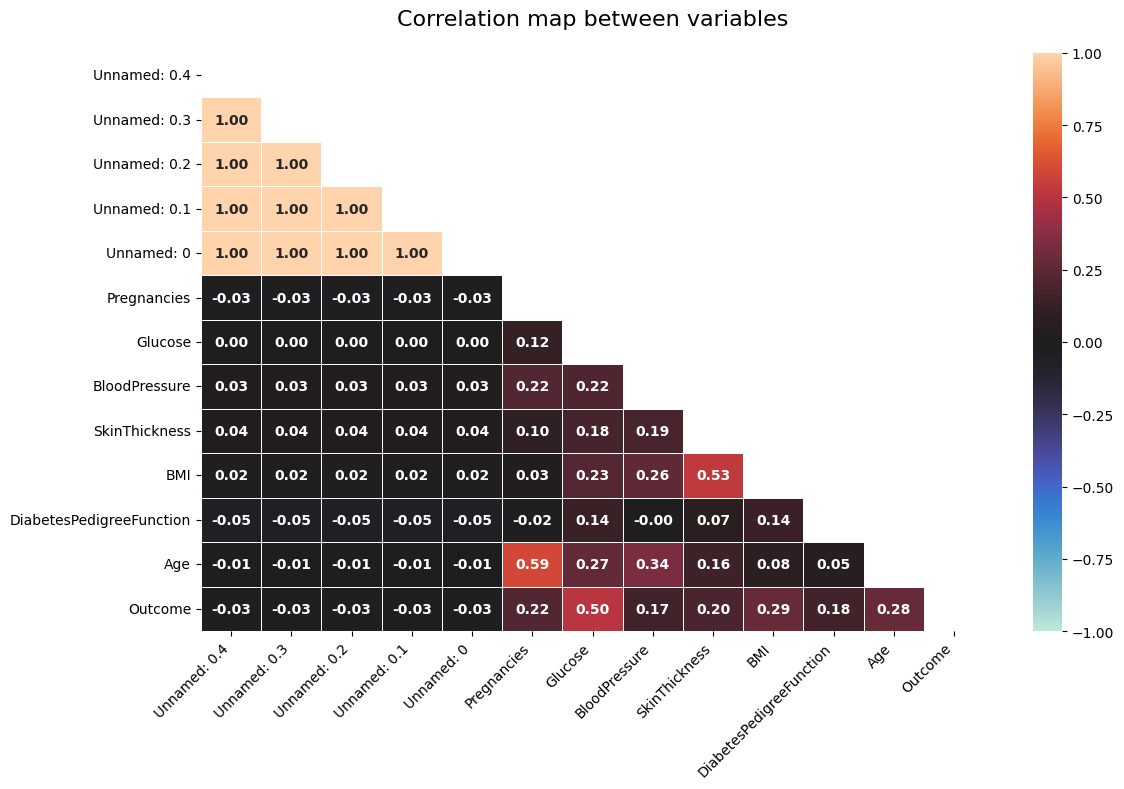

In [154]:
plt.figure(figsize=(12, 8))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='icefire', 
           fmt=".2f", linewidths=0.5, vmin=-1, vmax=1,
           annot_kws={"size":10, "weight":"bold"})
plt.title('Correlation map between variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

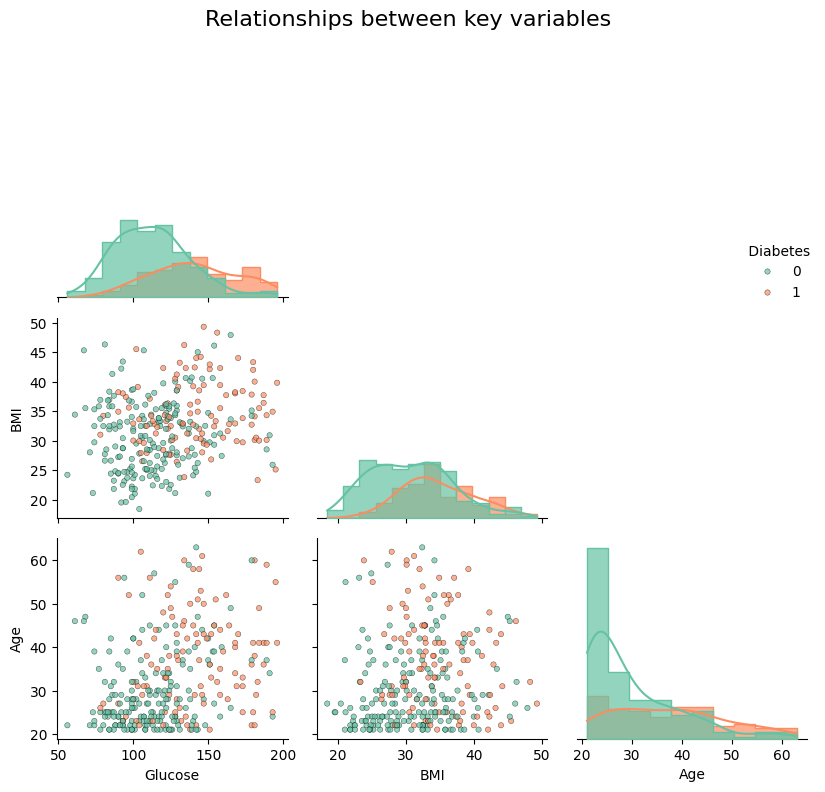

In [155]:
g = sns.PairGrid(data[['Glucose','BMI','Age','Outcome']].sample(300), 
                hue='Outcome', palette='Set2', corner=True)
g.map_lower(sns.scatterplot, s=15, alpha=0.7, edgecolor='black')
g.map_diag(sns.histplot, kde=True, alpha=0.7, element='step')
g.fig.suptitle('Relationships between key variables', y=1.05, fontsize=16)
g.add_legend(title=' Diabetes', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15740\1735585687.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Outcome', data=data,
C:\Users\ahmed\AppData\Local\Temp\ipykernel_15740\1735585687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Outcome', data=data,


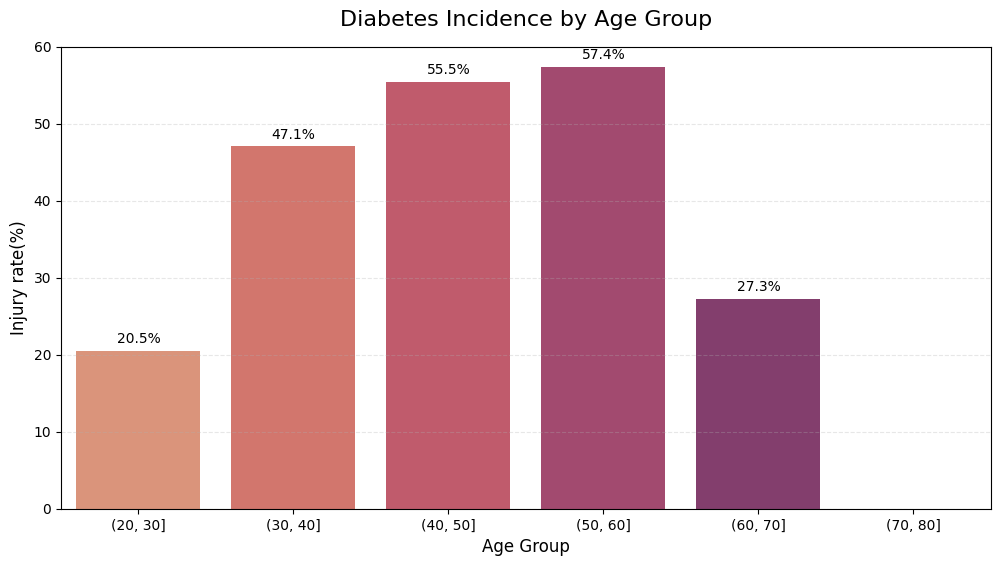

In [156]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[20,30,40,50,60,70,80])
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Outcome', data=data, 
           palette='flare', ci=None, estimator=lambda x: sum(x)*100/len(x))
plt.title('Diabetes Incidence by Age Group', fontsize=16, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Injury rate(%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, 60)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', 
                      (p.get_x()+p.get_width()/2, p.get_height()+1),
                      ha='center', fontsize=10)
plt.show()

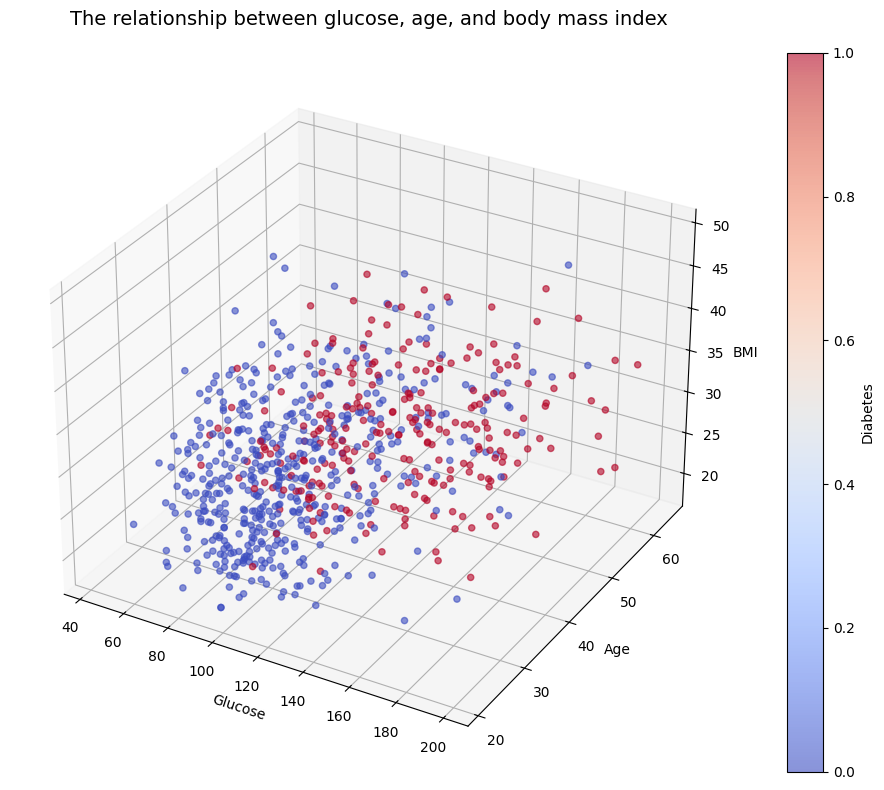

In [157]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = data['Glucose']
y = data['Age']
z = data['BMI']
c = data['Outcome']

scatter = ax.scatter(x, y, z, c=c, cmap='coolwarm', alpha=0.6, s=20)
ax.set_xlabel('Glucose', fontsize=10)
ax.set_ylabel('Age', fontsize=10)
ax.set_zlabel('BMI', fontsize=10)
ax.set_title('The relationship between glucose, age, and body mass index', fontsize=14, pad=20)
fig.colorbar(scatter, ax=ax, label='Diabetes')
plt.tight_layout()
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Models </h1>

In [158]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Linear Regression": LinearRegression()
}


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train and Evaluate Models </h1>

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Linear Regression": LinearRegression()
}

results = {}
for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)

    if name == "Linear Regression":
        preds = [1 if p >= 0.5 else 0 for p in preds]

    acc = accuracy_score(Y_test, preds)
    report = classification_report(Y_test, preds, output_dict=True)
    cm = confusion_matrix(Y_test, preds)

    results[name] = {
        "Accuracy": acc,
        "Report": report,
        "Confusion Matrix": cm
    }

    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, preds))

for model_name, metrics in results.items():
    print(f"\n📊 {model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics["Report"]).transpose())
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])



🔧 Training Logistic Regression...
Logistic Regression Accuracy: 0.7703
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.68      0.57      0.62        49

    accuracy                           0.77       148
   macro avg       0.74      0.72      0.73       148
weighted avg       0.76      0.77      0.76       148


🔧 Training Random Forest...
Random Forest Accuracy: 0.7230
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.59      0.53      0.56        49

    accuracy                           0.72       148
   macro avg       0.68      0.67      0.68       148
weighted avg       0.72      0.72      0.72       148


🔧 Training XGBoost...
XGBoost Accuracy: 0.7365
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.8


Model Comparison:
Logistic Regression: Accuracy = 0.7703
Random Forest: Accuracy = 0.7230
XGBoost: Accuracy = 0.7365
Linear Regression: Accuracy = 0.7635


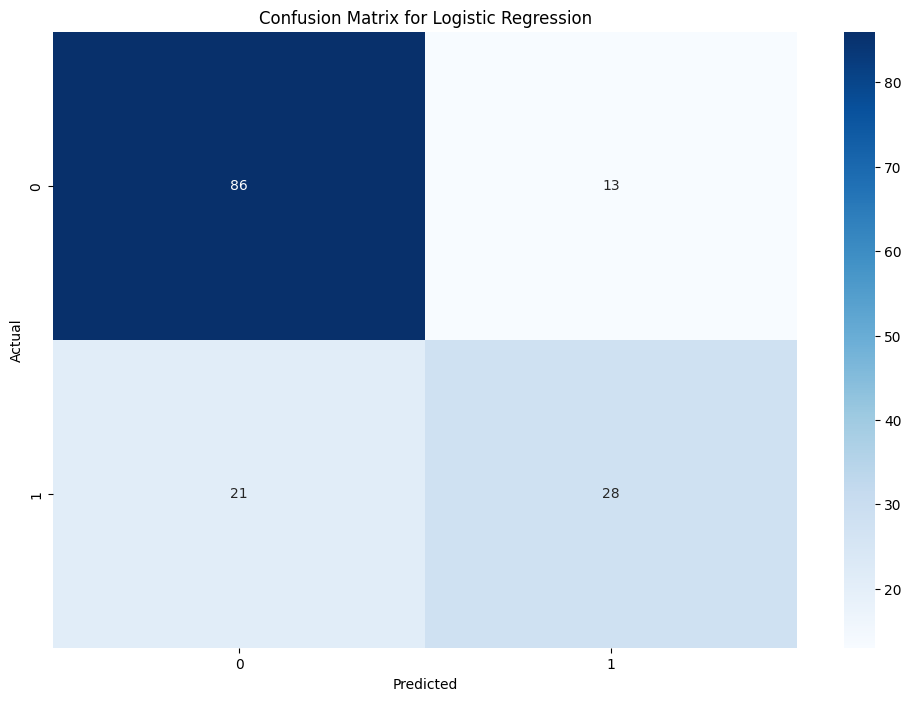

In [161]:
print("\nModel Comparison:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['Accuracy']:.4f}")

# Plot confusion matrix for the best model
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
cm = results[best_model_name]['Confusion Matrix']

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()